In [2]:
import requests
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from time import sleep
from random import randint

In [3]:
def get_count():
    url = "https://www.worldometers.info/coronavirus/"

    r = requests.get(url)
    html = r.text

    soup = BeautifulSoup(html)
    table = soup.find('table', {"class": "table table-bordered table-hover main_table_countries"})
    rows = table.find_all('tr')
    data = []

    for row in rows[1:]:
      cols = row.find_all('td')
      cols = [ele.text.strip() for ele in cols]
      data.append([ele for ele in cols if ele])

    # result = pd.DataFrame(data, columns = ['CountryOther',    'TotalCases',    'NewCases',    'TotalDeaths',    'NewDeaths',    'TotalRecovered',    'ActiveCases',    'Serious/Critical',    'TotCases/1Mpop',    'Deaths/1Mpop'])

    # Step 3: Analyze the HTML tag, where your content lives

    # Find the country list table in the webpage, using find returns the first occurence 
    my_table = soup.find('table',{'id':'main_table_countries_today'})

    # Find all table rows in the first table (i.e. the table of interest)
    table_rows = my_table.find_all('tr')

    # Since the country names are the first button in each row, find all buttons from the 
    # 1st row and return their text. 
    # we use 'td' because td is the closing html tag
    countries = [row.find('td') for row in table_rows]

    # print(countries)

    pd.options.display.max_rows
    pd.options.display.max_rows = 999
    df = pd.DataFrame()
    df['Country'] = countries
    df

    cases=[]
    for row in table_rows:
        cols=row.find_all('td')
        cols=[x.text.strip() for x in cols]
        cases.append(cols)

    # Getting attribute name 
    # find the tables 
    attribute_tag = my_table.find_all('th')
    attribute=[]
    for i in attribute_tag:
        attribute.append(i.text)

    df=pd.DataFrame(cases,columns=attribute)

    df_new=df[1:-1]

    result = df_new.fillna("Nan")

    return result


In [4]:
df_test = get_count()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 1 to 246
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   #                    246 non-null    object
 1   Country,Other        246 non-null    object
 2   TotalCases           246 non-null    object
 3   NewCases             246 non-null    object
 4   TotalDeaths          246 non-null    object
 5   NewDeaths            246 non-null    object
 6   TotalRecovered       246 non-null    object
 7   NewRecovered         246 non-null    object
 8   ActiveCases          246 non-null    object
 9   Serious,Critical     246 non-null    object
 10  Tot Cases/1M pop     246 non-null    object
 11  Deaths/1M pop        246 non-null    object
 12  TotalTests           246 non-null    object
 13  Tests/
1M pop
       246 non-null    object
 14  Population           246 non-null    object
 15  Continent            246 non-null    object
 16  1 Caseev

In [5]:
df_test.head(10)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
1,,North America,"123,339,476","+8,223","1,596,750",+164,"118,284,335","+17,825","3,458,391","8,748",...,,,,North America,,,,,,
2,,Asia,"212,706,749","+112,168","1,528,960",+353,"197,203,602","+92,222","13,974,187","15,993",...,,,,Asia,,,,,,
3,,Europe,"244,747,927","+16,852","2,005,364",+140,"240,422,769","+55,035","2,319,794","6,543",...,,,,Europe,,,,,,
4,,South America,"67,687,655","+1,029","1,347,147",+6,"65,812,463","+2,531","528,045","10,241",...,,,,South America,,,,,,
5,,Oceania,"13,888,348",+25,"25,232",,"13,718,857",+48,"144,259",77,...,,,,Australia/Oceania,,,,,,
6,,Africa,"12,773,523",+300,"258,499",,"12,058,942",+18,"456,082",547,...,,,,Africa,,,,,,
7,,,721,,15,,706,,0,0,...,,,,,,,,,,
8,,World,"675,144,399","+138,597","6,761,967",+663,"647,501,674","+167,679","20,880,758","42,149",...,,,,All,,,,,,
9,1,USA,"104,194,002","+8,214","1,132,917",+164,"101,308,936","+18,058","1,752,149","3,582",...,"1,159,819,106","3,464,160","334,805,269",North America,3,296,0,25,0.5,"5,233"
10,2,India,"44,682,784",,"530,740",,"44,150,289",,"1,755",698,...,"915,265,788","650,679","1,406,631,776",Asia,31,"2,650",2,,,1


In [6]:
##we want to see all the columns without the eclipses

pd.set_option("display.max.columns", None)

In [7]:
df_test.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
1,,North America,"123,339,476","+8,223","1,596,750",+164,"118,284,335","+17,825","3,458,391","8,748",,,,,,North America,,,,,,
2,,Asia,"212,706,749","+112,168","1,528,960",+353,"197,203,602","+92,222","13,974,187","15,993",,,,,,Asia,,,,,,
3,,Europe,"244,747,927","+16,852","2,005,364",+140,"240,422,769","+55,035","2,319,794","6,543",,,,,,Europe,,,,,,
4,,South America,"67,687,655","+1,029","1,347,147",+6,"65,812,463","+2,531","528,045","10,241",,,,,,South America,,,,,,
5,,Oceania,"13,888,348",+25,"25,232",,"13,718,857",+48,"144,259",77,,,,,,Australia/Oceania,,,,,,


In [8]:
##since empty cells are null values, we replace them with NaN

df_test = df_test.replace('', np.nan)
df_test = df_test.replace('N/A', np.nan)

In [9]:
df_test.head(10)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
1,NaN,North America,"123,339,476","+8,223","1,596,750",+164,"118,284,335","+17,825","3,458,391","8,748",NaN,NaN,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Asia,"212,706,749","+112,168","1,528,960",+353,"197,203,602","+92,222","13,974,187","15,993",NaN,NaN,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Europe,"244,747,927","+16,852","2,005,364",+140,"240,422,769","+55,035","2,319,794","6,543",NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,South America,"67,687,655","+1,029","1,347,147",+6,"65,812,463","+2,531","528,045","10,241",NaN,NaN,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Oceania,"13,888,348",+25,"25,232",NaN,"13,718,857",+48,"144,259",77,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Africa,"12,773,523",+300,"258,499",NaN,"12,058,942",+18,"456,082",547,NaN,NaN,NaN,NaN,NaN,Africa,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,721,NaN,15,NaN,706,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,World,"675,144,399","+138,597","6,761,967",+663,"647,501,674","+167,679","20,880,758","42,149","86,615",867.5,NaN,NaN,NaN,All,NaN,NaN,NaN,NaN,NaN,NaN
9,1,USA,"104,194,002","+8,214","1,132,917",+164,"101,308,936","+18,058","1,752,149","3,582","311,208","3,384","1,159,819,106","3,464,160","334,805,269",North America,3,296,0,25,0.5,"5,233"
10,2,India,"44,682,784",NaN,"530,740",NaN,"44,150,289",NaN,"1,755",698,"31,766",377,"915,265,788","650,679","1,406,631,776",Asia,31,"2,650",2,NaN,NaN,1


In [9]:
df_test.isnull()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
1,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True
2,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True
3,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True
4,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True
5,True,False,False,False,False,True,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True
6,True,False,False,False,False,True,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True
7,True,True,False,True,False,True,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True
8,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,True,True,True
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False


In [10]:
##we install some dependencies to help us explore our dataset

!pip install requests pandas matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


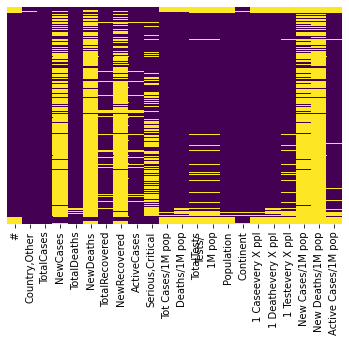

In [11]:
##visualize the extent of null values in the dataset

sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [12]:
##I checked for the percentage of null values in the columns

df_test.isnull().mean() * 100

#                       6.097561
Country,Other           0.406504
TotalCases              0.000000
NewCases               74.796748
TotalDeaths             2.439024
NewDeaths              86.585366
TotalRecovered          8.536585
NewRecovered           76.016260
ActiveCases             7.723577
Serious,Critical       39.430894
Tot Cases/1M pop        6.504065
Deaths/1M pop           8.943089
TotalTests             13.414634
Tests/\n1M pop\n       13.414634
Population              6.910569
Continent               1.626016
1 Caseevery X ppl       6.910569
1 Deathevery X ppl      9.349593
1 Testevery X ppl      13.414634
New Cases/1M pop       80.081301
New Deaths/1M pop      90.243902
Active Cases/1M pop     9.756098
dtype: float64

### #NewCases has 82.926%, NewDeaths has 89.024%, NewRecovered has 80.489%, New Cases/1M pop has 87.398% and New Deaths/1M pop has 92.682% null values. These are way higher than the acceptable 50% threshold, hence, these columns have to be dropped.

In [13]:
##let's drop all the columns with more than 50% null values

df_test = df_test.drop(['NewCases', 'NewDeaths', 'NewRecovered', 'New Cases/1M pop', 'New Deaths/1M pop'], axis=1)
df_test.head(10)

,#,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,Active Cases/1M pop
1,NaN,North America,"123,339,476","1,596,750","118,284,335","3,458,391","8,748",NaN,NaN,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN
2,NaN,Asia,"212,706,749","1,528,960","197,203,602","13,974,187","15,993",NaN,NaN,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN
3,NaN,Europe,"244,747,927","2,005,364","240,422,769","2,319,794","6,543",NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN
4,NaN,South America,"67,687,655","1,347,147","65,812,463","528,045","10,241",NaN,NaN,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN
5,NaN,Oceania,"13,888,348","25,232","13,718,857","144,259",77,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN
6,NaN,Africa,"12,773,523","258,499","12,058,942","456,082",547,NaN,NaN,NaN,NaN,NaN,Africa,NaN,NaN,NaN,NaN
7,NaN,NaN,721,15,706,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,World,"675,144,399","6,761,967","647,501,674","20,880,758","42,149","86,615",867.5,NaN,NaN,NaN,All,NaN,NaN,NaN,NaN
9,1,USA,"104,194,002","1,132,917","101,308,936","1,752,149","3,582","311,208","3,384","1,159,819,106","3,464,160","334,805,269",North America,3,296,0,"5,233"
10,2,India,"44,682,784","530,740","44,150,289","1,755",698,"31,766",377,"915,265,788","650,679","1,406,631,776",Asia,31,"2,650",2,1


In [22]:
df_test.head(20)

,#,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,Active Cases/1M pop
1,NaN,North America,123339476,1596750.0,118284335.0,3458391.0,"8,748",NaN,NaN,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN
2,NaN,Asia,212706749,1528960.0,197203602.0,13974187.0,"15,993",NaN,NaN,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN
3,NaN,Europe,244747927,2005364.0,240422769.0,2319794.0,"6,543",NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN
4,NaN,South America,67687655,1347147.0,65812463.0,528045.0,"10,241",NaN,NaN,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN
5,NaN,Oceania,13888348,25232.0,13718857.0,144259.0,77,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN
6,NaN,Africa,12773523,258499.0,12058942.0,456082.0,547,NaN,NaN,NaN,NaN,NaN,Africa,NaN,NaN,NaN,NaN
7,NaN,NaN,721,15.0,706.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,World,675144399,6761967.0,647501674.0,20880758.0,"42,149","86,615",867.5,NaN,NaN,NaN,All,NaN,NaN,NaN,NaN
9,1,USA,104194002,1132917.0,101308936.0,1752149.0,"3,582","311,208","3,384","1,159,819,106","3,464,160","334,805,269",North America,3,296,0,"5,233"
10,2,India,44682784,530740.0,44150289.0,1755.0,698,"31,766",377,"915,265,788","650,679","1,406,631,776",Asia,31,"2,650",2,1


In [15]:
for row in df_test['TotalRecovered']:
  if row == 'NaN': TotalRecovered.append('0')
  else:    
  

SyntaxError: ignored

In [15]:
for col in ['TotalCases', 'ActiveCases', 'TotalDeaths', 'TotalRecovered']:
    df_test[col] = pd.to_numeric(df_test[col].astype(str).str.replace(r'[^0-9.]',''), errors='coerce')


<ipython-input-15-234b65577fdd>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test[col] = pd.to_numeric(df_test[col].astype(str).str.replace(r'[^0-9.]',''), errors='coerce')


In [17]:
df_test.dtypes

#                       object
Country,Other           object
TotalCases               int64
TotalDeaths            float64
TotalRecovered         float64
ActiveCases            float64
Serious,Critical        object
Tot Cases/1M pop        object
Deaths/1M pop           object
TotalTests              object
Tests/\n1M pop\n        object
Population              object
Continent               object
1 Caseevery X ppl       object
1 Deathevery X ppl      object
1 Testevery X ppl       object
Active Cases/1M pop     object
dtype: object

In [19]:
df_test.tail()

,#,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,Active Cases/1M pop
242,NaN,Total:,244747927,2005364.0,240422769.0,2319794.0,"6,543",NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN
243,NaN,Total:,67687655,1347147.0,65812463.0,528045.0,"10,241",NaN,NaN,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN
244,NaN,Total:,13888348,25232.0,13718857.0,144259.0,77,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN
245,NaN,Total:,12773523,258499.0,12058942.0,456082.0,547,NaN,NaN,NaN,NaN,NaN,Africa,NaN,NaN,NaN,NaN
246,NaN,Total:,721,15.0,706.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
for index, row in df_test.iterrows():
    if pd.isnull(row['TotalRecovered']):
        df_test.loc[index, 'TotalRecovered'] = row['TotalCases'] - (row['TotalDeaths'] + row['ActiveCases'])